In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('HousingDB.csv')
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
0,42000.0,5850,3,1,2,1,no,yes,no
1,38500.0,4000,2,1,1,0,no,no,no
2,49500.0,3060,3,1,1,0,no,no,no
3,60500.0,6650,3,1,2,0,yes,no,no
4,61000.0,6360,2,1,1,0,no,no,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   garagepl  546 non-null    int64  
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   airco     546 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 38.5+ KB


In [4]:
data['price'].mean()

68121.59706959708

In [5]:
#Create One Hot Encoded Dataframe

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

data_object = data.select_dtypes('object')
ohe.fit(data_object)

codes = ohe.transform(data_object).toarray()
feature_names = ohe.get_feature_names_out(data_object.columns)

data_ohe = pd.concat([data.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

data_ohe.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom_yes,fullbase_yes,airco_yes
0,42000.0,5850,3,1,2,1,0,1,0
1,38500.0,4000,2,1,1,0,0,0,0
2,49500.0,3060,3,1,1,0,0,0,0
3,60500.0,6650,3,1,2,0,1,0,0
4,61000.0,6360,2,1,1,0,0,0,0


In [6]:
#Define x and y variable
x = data_ohe.drop(['price'],axis=1).to_numpy()
y = data_ohe['price'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

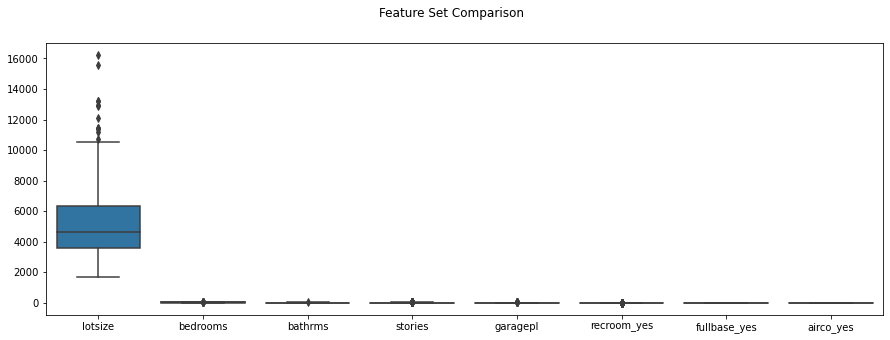

In [7]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=data_ohe.drop('price',axis=1))
plt.show()

price


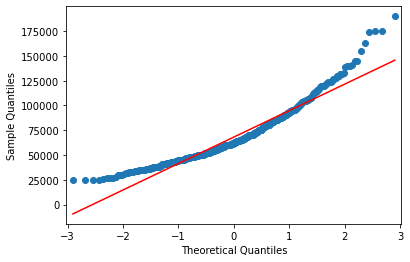

lotsize


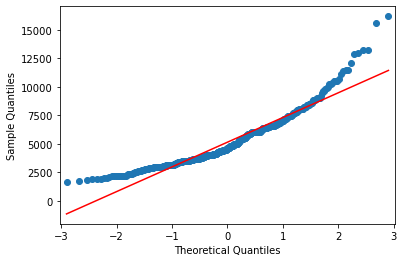

bedrooms


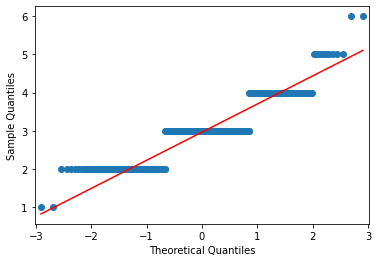

bathrms


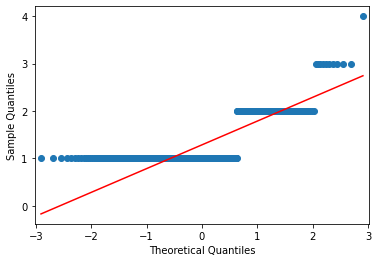

stories


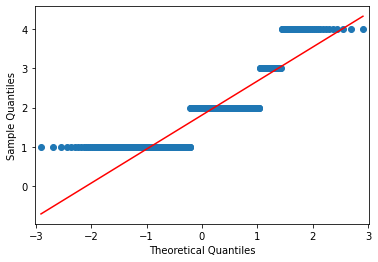

garagepl


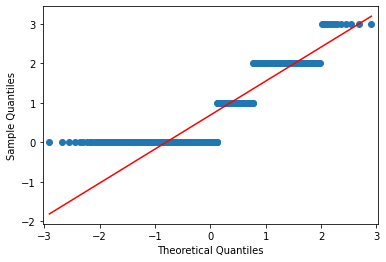

recroom_yes


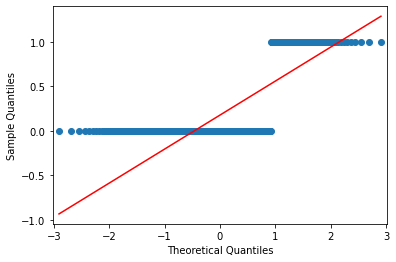

fullbase_yes


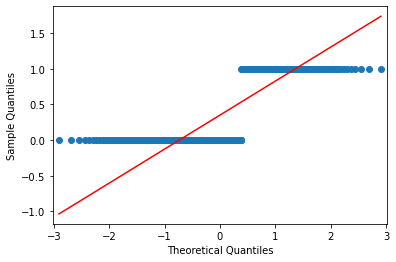

airco_yes


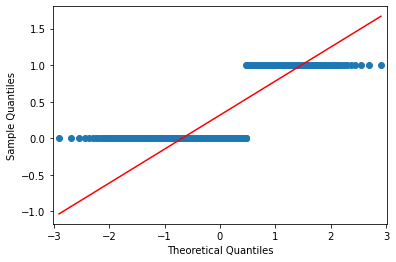

In [8]:
#Create QQ Plots

from statsmodels.graphics.gofplots import qqplot
import pylab

cnt = 1
for col in data_ohe.columns:
    print(col)
    qqplot(data_ohe[col],line='s')
    pylab.show()
    cnt += 1    

In [9]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro

cnt = 1
for col in data_ohe.columns:
    print(col)
    stat, p = shapiro(data_ohe[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05  
    if p > alpha:
     print('Sample looks Gaussian (fail to reject H0)')
    else:
     print('Sample does not look Gaussian (reject H0)')
    cnt += 1    

price
Statistics=0.922, p=0.000
Sample does not look Gaussian (reject H0)
lotsize
Statistics=0.911, p=0.000
Sample does not look Gaussian (reject H0)
bedrooms
Statistics=0.829, p=0.000
Sample does not look Gaussian (reject H0)
bathrms
Statistics=0.578, p=0.000
Sample does not look Gaussian (reject H0)
stories
Statistics=0.774, p=0.000
Sample does not look Gaussian (reject H0)
garagepl
Statistics=0.748, p=0.000
Sample does not look Gaussian (reject H0)
recroom_yes
Statistics=0.463, p=0.000
Sample does not look Gaussian (reject H0)
fullbase_yes
Statistics=0.603, p=0.000
Sample does not look Gaussian (reject H0)
airco_yes
Statistics=0.586, p=0.000
Sample does not look Gaussian (reject H0)


In [10]:
#Create Standard Model

#Define x and y variable
x = data_ohe.drop('price',axis=1).to_numpy()
y = data_ohe['price'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.linear_model import LinearRegression

In [11]:
#Create Standard Model - using Dummy Variables

from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\n Regression Model - using OneHotEncoder')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         data_ohe.drop(['price'],axis=1).columns,
                         columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


 Regression Model - using OneHotEncoder

Method: Linear regression

Intercept: 68860.08
              Coefficients
lotsize        8634.475677
bedrooms       1368.299630
bathrms        7127.520695
stories        6567.390507
garagepl       4597.365623
recroom_yes    2054.126514
fullbase_yes   3661.398670
airco_yes      5736.782817

R2: 0.54
Adj_R2: 0.53
Mean Absolute Error: 12127.85
Mean Squared Error: 253496059.87
Root Mean Squared Error: 15921.56
